# Insurance Fraud Detection using Random Forest

## Introduction

Artificial intelligence is commonly used in various trade circles to automate processes, gather insights on business, and speed up processes. You will use Python to study the usage of artificial intelligence in real-life scenarios - how AI actually impacts businesses. 

Insurance fraud is a very big and important problem. There are a variety of frauds that keep occuring. Some of them are common. Thus, predicting them beforehand can save a large amount of money. As always, AI can help us in this case. 

In this notebook, we will focus on insurance fraud detection using Random Forest.

## Context

We will be working with auto insurance claim data, obtained from [Kaggle](https://www.kaggle.com/buntyshah/auto-insurance-claims-data). Kaggle is a platform for data enthusiasts to gather, share knowledge and compete for many prizes! The data has been cleaned and included as insurance.csv.


### Side note: What is Random Forest?

Random Forest is a classification algorithm that combines the decision from many decision trees and decides the class for a data point. We get a decision based on the various trees, do the majority voting and decide on the class. The following diagram would make it clear.

![Random Forest](https://miro.medium.com/max/888/1*i0o8mjFfCn-uD79-F1Cqkw.png)

## Use Python to open csv files

We will use the [pandas](https://pandas.pydata.org/) and [scikit-learn](https://scikit-learn.org/stable/) libraries to work with our dataset. Pandas is a popular Python library for data science. It offers powerful and flexible data structures to make data manipulation and analysis easier. Scikit-learn is a very useful machine learning library that provides efficient tools for predictive data analysis.


## Import Libraries


In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Read the CSV file

In [2]:
df = pd.read_csv(r'[Dataset]_Module11_(Insurance).csv')
df.head()

,Unnamed: 0,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
0,0,53300,0,5,1,2,71610,1,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,8,1,0,5070,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,35100,0,7,3,3,34650,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,48900,-62400,5,1,2,63400,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,66000,-46000,20,1,1,6500,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [3]:
#We are checking number of null values for various features
df.isnull().sum()

Unnamed: 0                                0
capital-gains                             0
capital-loss                              0
incident_hour_of_the_day                  0
number_of_vehicles_involved               0
                                         ..
policy_annual_premium_groups_high         0
policy_annual_premium_groups_low          0
policy_annual_premium_groups_medium       0
policy_annual_premium_groups_very high    0
policy_annual_premium_groups_very low     0
Length: 69, dtype: int64

In [4]:
#Let us get some more info about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Unnamed: 0                              1000 non-null   int64
 1   capital-gains                           1000 non-null   int64
 2   capital-loss                            1000 non-null   int64
 3   incident_hour_of_the_day                1000 non-null   int64
 4   number_of_vehicles_involved             1000 non-null   int64
 5   witnesses                               1000 non-null   int64
 6   total_claim_amount                      1000 non-null   int64
 7   fraud_reported                          1000 non-null   int64
 8   insured_sex_FEMALE                      1000 non-null   int64
 9   insured_sex_MALE                        1000 non-null   int64
 10  insured_occupation_adm-clerical         1000 non-null   int64
 11  insured_occupation

### Task 1: Display information about the dataset using the describe function

In [5]:
df.describe()

,Unnamed: 0,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.0000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,499.500000,25126.100000,-26793.700000,11.644000,1.83900,1.487000,52761.94000,0.247000,0.537000,0.463000,...,0.080000,0.043000,0.04200,0.047000,0.1020,0.153000,0.151000,0.69300,0.001000,0.002000
std,288.819436,27872.187708,28104.096686,6.951373,1.01888,1.111335,26401.53319,0.431483,0.498879,0.498879,...,0.271429,0.202959,0.20069,0.211745,0.3028,0.360168,0.358228,0.46148,0.031623,0.044699
min,0.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,100.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,249.750000,0.000000,-51500.000000,6.000000,1.00000,1.000000,41812.50000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,499.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,58055.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,749.250000,51025.000000,0.000000,17.000000,3.00000,2.000000,70592.50000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,1.00000,0.000000,0.000000
max,999.000000,100500.000000,0.000000,23.000000,4.00000,3.000000,114920.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.0000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
#Fraud_reported is the target column. Let us check its unique values
df['fraud_reported'].unique()

array([1, 0], dtype=int64)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

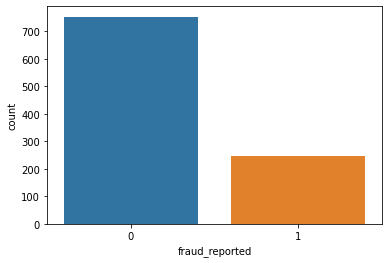

In [7]:
#Here we are seeing the distribution of 0s and 1s in fraud_reported column
sns.countplot(df['fraud_reported'])

## Checking correlation between features

Here we are using the plotly library for plotting the correlation diagram.

A correlation matrix is a table that shows the relation between variables - how one variable changes when another variable is changed. If there are 5 variables, the correlation matrix will have 5 times 5 or 25 entries, where each entry shows the correlation between two variables.

The accuracy of a machine learning algorithm is a measure of how well the algorithm is performing - how often the algorithm classifies a data point correctly. Accuracy is given by:

![Accuracy](https://miro.medium.com/max/1050/1*O5eXoV-SePhZ30AbCikXHw.png)

Precision means the % of the results that are relevant, while recall refers to the % of total relevant results correctly classified by an algorithm. 

![Precision and Recall](https://miro.medium.com/max/1050/1*pOtBHai4jFd-ujaNXPilRg.png)

True positive: The model correctly predicts the positive class. 

True negative: The model correctly predicts the negative class.

False positive: The model incorrectly predicts the positive class. 

False negative: The model incorrectly predicts the negative class.


We will be using the plotly library. <br>
If you do not have the library installed, please do the below step in your terminal: <br>
pip install plotly

In [9]:
! pip install plotly

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [10]:
import plotly.express as px
import plotly.graph_objects as go

#getting the correlation matrix using corr() function of pandas
corr_matrix = df.corr()

fig = go.Figure(data = go.Heatmap(
                                z = corr_matrix.values,
                                x = list(corr_matrix.columns),
                                y = list(corr_matrix.index)))

fig.update_layout(title = 'Correlation_Insurance_Fraud')

fig.show()

In [13]:
features = []
for col in df.columns:
    if col != 'fraud_reported':
        features.append(col)

target = 'fraud_reported'

X = df[features]
y = df[target]

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [15]:
#We are splitting the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

## Applying Random Forest Classifier

Random Forest is a classification algorithm that combines the decision from many decision trees and decides the class for a data point. We get a decision based on the various trees, do the majority voting and decide on the class.

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### Task 2: Predict the training data using the Random Forest Classifier and store the result in a variable preds


In [17]:
preds = rfc.predict(X_test)

In [18]:
score = rfc.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))


83.6

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       180
           1       0.76      0.60      0.67        70

    accuracy                           0.84       250
   macro avg       0.81      0.76      0.78       250
weighted avg       0.83      0.84      0.83       250



### Task 3: You have seen the result from a Random Forest Classifier. Now try to fit the data using a Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [20]:
preds_dtc = dtc.predict(X_test)

In [21]:
score = dtc.score(X_test, y_test)
print(100*score)
print()
print(classification_report(y_test, preds_dtc))

77.2

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       180
           1       0.60      0.54      0.57        70

    accuracy                           0.77       250
   macro avg       0.72      0.70      0.71       250
weighted avg       0.77      0.77      0.77       250



### Task 4: You have seen the result from a Decision Tree Classifier. Now try to fit the data using a Logistic Regression Classifier

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_test, y_test)

LogisticRegression()

In [25]:
preds_lr = lr.predict(X_test)

In [27]:
score = lr.score(X_test, y_test)
print(100*score)
print()
print(classification_report(y_test, preds_lr))

94.8

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       180
           1       0.91      0.90      0.91        70

    accuracy                           0.95       250
   macro avg       0.94      0.93      0.94       250
weighted avg       0.95      0.95      0.95       250



### Conclusion



So we can conclude that with logistic regression results the highest accuracy